In [40]:
import re
import pickle
import datetime
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [48]:
df = pickle.load(open( "oppenheimerWebData.pkl", "rb" ))

In [49]:
df.head()

,visitor-ids,user-ids,timestamp,webpage,state,browser,platform
0,239007,null,2.155359e+07,/doc_viewer/ETF_Trust_Single_Factor_SAI.pdf,North Carolina,desktop-macOS,Safari
1,239007,null,2.156321e+07,/da/Rochester_Limited_Term_California_Municipa...,North Carolina,desktop-macOS,Safari
2,239007,null,2.165911e+07,/doc/Year_End_Tax_Tables.pdf,North Carolina,desktop-macOS,Safari
3,239007,null,2.155720e+07,/faq/life-events-required-minimum-distribution...,North Carolina,desktop-macOS,Safari
4,239007,null,2.156513e+07,/da/Corporate_Bond_Fund_Semiannual_Report.pdf,North Carolina,desktop-macOS,Safari


In [8]:
len(df)

3615091

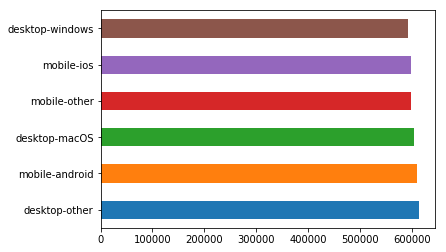

In [21]:
df['browser'].value_counts().plot(kind='barh')

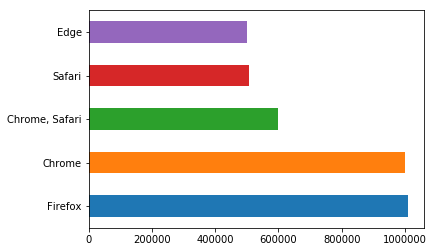

In [22]:
df['platform'].value_counts().plot(kind='barh')

In [54]:
print('unique user-ids: ',len(df['user-ids'].unique()))
print('unique visitor-ids: ',len(df['visitor-ids'].unique()))

unique user-ids:  8598
unique visitor-ids:  343942


In [29]:
x = Counter(df['user-ids'])
x.most_common(5)

[('null', 3427387),
 (74309973, 152),
 (18135311, 131),
 (40945576, 128),
 (66759484, 117)]

In [122]:
for k,v in dict(z).items():
    print(k,v)

343942

In [105]:
z = Counter(df['visitor-ids'])
z.most_common(5)

[(529946, 122), (571606, 121), (274607, 105), (358470, 102), (501660, 100)]

In [44]:
web_count = Counter(df['webpage'])
web_count.most_common()[:15]

[('/da/Alan_Panzer_Biography.pdf', 41255),
 ('/da/Broker_Dealer_Channel_ETF_Specialist_Territory_Map.pdf', 19802),
 ('/da/International_Equity_Fund_Announcement.pdf', 915),
 ('/da/The_Education_Plan_Account_Maintenance_Form.pdf', 914),
 ('/consultant/jeff-botwinick', 912),
 ('/investment-strategies/global-select-equity', 912),
 ('/profile/password', 909),
 ('/personalities/rick-henn', 904),
 ('/da/ESG_in_Focus_Why_Is_ESG_Investing_in_Demand.pdf', 902),
 ('/doc/SandP_Ultra_Dividend_Revenue_ETF_Product_Brief.pdf', 901),
 ('/da/CEO_Client_Engagement_Toolkit.pdf', 900),
 ('/models', 898),
 ('/doc/Large_Cap_Dynamic_Multifactor_IPA_Institutional_Fact_Sheet.pdf', 898),
 ('/literature-center/order/verify', 895),
 ('/article/saving-will-hurt-financial-aid-chances', 895)]

In [304]:
print(df['webpage'][3838],df['webpage'][1497])

/da/Alan_Panzer_Biography.pdf /da/Broker_Dealer_Channel_ETF_Specialist_Territory_Map.pdf


In [123]:
req_vis_nums = []
uniq_vis = df['visitor-ids'].unique()
for i in range(len(uniq_vis)): 
    if len(df.loc[df['visitor-ids'] == uniq_vis[i]]['user-ids'].unique())>1:
        req_vis_nums.append(uniq_vis[i])

In [129]:
df.loc[df['visitor-ids'] == req_vis_nums[0]]['user-ids'].unique()

array(['null', 62834466], dtype=object)

In [130]:
sub_df = df[df['visitor-ids'].isin(req_vis_nums)]

In [132]:
sub_df.head()

,visitor-ids,user-ids,timestamp,webpage,state,browser,platform
283,239026,null,2.628477e+07,/doc/Main_Street_Small_Cap_Fund_VA_Summary_Pro...,Delaware,mobile-android,Firefox
284,239026,62834466,2.673618e+07,/article/consider-small-caps-as-a-core-portfol...,Delaware,mobile-android,Firefox
285,239026,62834466,2.627291e+07,/da/OFI_Pictet_Global_Environmental_Solutions_...,Delaware,mobile-android,Firefox
286,239026,62834466,2.628017e+07,/doc/Municipal_Fund_Summary_Prospectus.pdf,Delaware,mobile-android,Firefox
287,239026,62834466,2.627181e+07,/doc/Emerging_Markets_Ultra_Dividend_Revenue_E...,Delaware,mobile-android,Firefox


In [141]:
sub_df.to_csv('registered.csv',encoding='utf-8')

In [46]:
sub_df = pd.read_csv('registered.csv', encoding='utf-8')

/home/pranavpks/anaconda2/envs/py36/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
sub_web_count = Counter(sub_df['webpage'])
sub_web_count.most_common()[:15]

[(1497, 14261),
 ('1497', 3541),
 (3838, 2888),
 ('3838', 706),
 (2477, 88),
 (1955, 87),
 (2905, 83),
 (195, 82),
 (2197, 82),
 (3473, 81),
 (78, 80),
 (3260, 80),
 (3207, 80),
 (3779, 79),
 (4347, 79)]

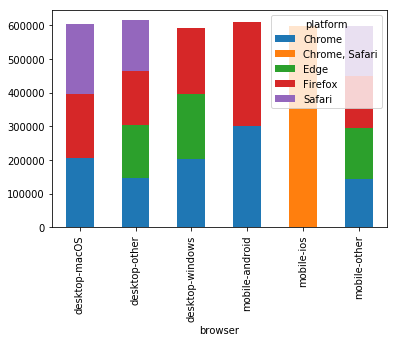

In [160]:
df.groupby(['browser', 'platform']).size().unstack().plot(kind='bar', stacked=True)

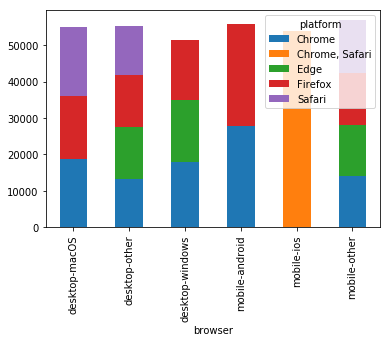

In [280]:
sub_df.groupby(['browser', 'platform']).size().unstack().plot(kind='bar', stacked=True)

In [63]:
wb = Counter(df['webpage'])
wb.most_common(5)

[(3838, 41254), (1497, 19801), (460, 914), (4320, 913), (642, 911)]

In [48]:
states = Counter(df['state'])
states.most_common()

[('California', 232644),
 ('Arizona', 207889),
 ('Illinois', 206695),
 ('Colorado', 189495),
 ('New York', 146983),
 ('North Carolina', 128686),
 ('Delaware', 116517),
 ('New Mexico', 106245),
 ('Georgia', 105253),
 ('Indiana', 104843),
 ('Idaho', 100105),
 ('Virginia', 97885),
 ('Utah', 94875),
 ('Rhode Island', 92835),
 ('Tennessee', 92373),
 ('Kentucky', 91530),
 ('New Hampshire', 91090),
 ('Vermont', 89070),
 ('South Carolina', 86090),
 ('Alabama', 82370),
 ('Oklahoma', 81797),
 ('South Dakota', 80696),
 ('Oregon', 79309),
 ('Michigan', 77119),
 ('Massachusetts', 70424),
 ('Hawaii', 69526),
 ('Ohio', 60827),
 ('Florida', 58302),
 ('Nevada', 54374),
 ('Iowa', 53784),
 ('Pennsylvania', 50523),
 ('Washington', 47072),
 ('Arkansas', 43098),
 ('Alaska', 36798),
 ('Louisiana', 35725),
 ('Montana', 35195),
 ('Minnesota', 26618),
 ('Wisconsin', 26229),
 ('North Dakota', 26201),
 ('Missouri', 24653),
 ('Maryland', 20861),
 ('Maine', 20388),
 ('New Jersey', 19609),
 ('Mississippi', 15033),
 

In [49]:
path_str_counts={}
for i in range(len(df)):
    y = df['webpage'][i]
    temp = y[1:y[1:].find('/')+1]
    if temp == '':
        temp = y[1:]
    if temp in path_str_counts:
        path_str_counts[temp] += 1
    else:
        path_str_counts[temp] = 1    
    if i%1000000==0:
        print(i)

0
1000000
2000000
3000000


In [372]:
da_counts={}
for i in range(len(df)):
    z = df['webpage'][i]
    if z[:4] == '/da/':
        if z not in da_counts:
            da_counts[z] = 1
        else:
            da_counts[z] += 1

In [376]:
print(len(da_counts))
Counter(da_counts).most_common(5)

1501


[('/da/Alan_Panzer_Biography.pdf', 41255),
 ('/da/Broker_Dealer_Channel_ETF_Specialist_Territory_Map.pdf', 19802),
 ('/da/International_Equity_Fund_Announcement.pdf', 915),
 ('/da/The_Education_Plan_Account_Maintenance_Form.pdf', 914),
 ('/da/ESG_in_Focus_Why_Is_ESG_Investing_in_Demand.pdf', 902)]

In [173]:
len(df[df['webpage'].str.isdigit().notnull()])

4371

In [103]:
print(len(path_nums_counts),len(path_str_counts),len(wb))

4371 85 8742


In [166]:
path_nums_counts.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [201]:
for i in range(len(df)):
    li.append(df['webpage'][i])

In [203]:
for i in range(len(df)):
    if str(li[i]).isdigit():
        index = li[i]
        li[i] = li[index]
    if i%1000000 == 0:
        print(i)

0
1000000
2000000
3000000


In [206]:
li_df = pd.DataFrame(li, columns=['webpage'])
df = df.drop(columns=['webpage'])
df['webpage'] = li_df

In [212]:
df.head()

,visitor-ids,user-ids,timestamp,state,browser,platform,webpage
0,239007,null,2.155359e+07,North Carolina,desktop-macOS,Safari,/doc_viewer/ETF_Trust_Single_Factor_SAI.pdf
1,239007,null,2.156321e+07,North Carolina,desktop-macOS,Safari,/da/Rochester_Limited_Term_California_Municipa...
2,239007,null,2.165911e+07,North Carolina,desktop-macOS,Safari,/doc/Year_End_Tax_Tables.pdf
3,239007,null,2.155720e+07,North Carolina,desktop-macOS,Safari,/faq/life-events-required-minimum-distribution...
4,239007,null,2.156513e+07,North Carolina,desktop-macOS,Safari,/da/Corporate_Bond_Fund_Semiannual_Report.pdf


In [213]:
df.to_csv('hackcu_data_webpage_corrected.csv', encoding='utf-8')

In [42]:
df = pd.read_csv('hackcu_data_webpage_corrected.csv', encoding='utf-8')

In [246]:
offset = 1546326000

In [281]:
for i in sub_df.index.values[:10]:
    timestamp = sub_df['timestamp'][i]/1000 + offset
    value = datetime.datetime.fromtimestamp(timestamp)
    print(sub_df['visitor-ids'][i],sub_df['user-ids'][i],value.strftime('%Y-%m-%d %H:%M:%S'))

239026 null 2019-01-01 07:18:04
239026 62834466 2019-01-01 07:25:36
239026 62834466 2019-01-01 07:17:52
239026 62834466 2019-01-01 07:18:00
239026 62834466 2019-01-01 07:17:51
239026 62834466 2019-01-01 07:17:48
239026 62834466 2019-01-01 07:18:03
239026 62834466 2019-01-01 07:17:52
239026 62834466 2019-01-01 07:17:48
239026 62834466 2019-01-01 07:18:05


[('da', 1281737), ('doc', 704934), ('article', 627995), ('literature-center', 143916), ('personalities', 112236), ('fund', 81356), ('faq', 79430), ('consultant', 69134), ('portfolio-manager', 62237), ('investment-strategies', 57839), ('investment-teams', 49962), ('funds', 37326), ('book', 24618), ('capabilities', 21244), ('doc_viewer', 20375)]


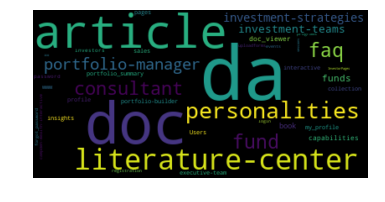

In [65]:
path1_count = Counter(path_str_counts)
print(path1_count.most_common()[:15])
wordcloud = WordCloud().generate_from_frequencies(dict(path1_count))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [321]:
len(path_str_counts)

85

In [289]:
def get_path(y):
    #y = df['webpage'][i]
    temp = y[1:y[1:].find('/')+1]
    if temp == '':
        temp = y[1:]
    return temp

In [314]:
uniq_vis = df['visitor-ids'].unique()
visitor_paths = {}
for i in range(len(uniq_vis)): 
    temp_df = df.loc[df['visitor-ids'] == uniq_vis[i]][['timestamp','webpage']]
    
    u_path = []
    for j in temp_df.index.values:
        u_path.append((temp_df['timestamp'][j],get_path(temp_df['webpage'][j])))
    u_path = sorted(u_path, key = lambda x:x[0])
    visitor_paths[uniq_vis[i]] = [x for _,x in u_path]
    
    if i%30000 == 0:
        print(i)

0
30000
60000
90000
120000
150000
180000
210000
240000
270000
300000
330000


In [323]:
print(visitor_paths[239007])

['doc_viewer', 'literature-center', 'faq', 'da', 'da', 'da', 'da', 'doc', 'article', 'article', 'doc', 'da']


In [320]:
pickle.dump(visitor_paths, open( "visitor_paths.pkl", "wb" ) )

In [38]:
visitor_paths = pickle.load(open( "visitor_paths.pkl", "rb" ))

In [4]:
pre_score_counts = {}

for k in visitor_paths.keys():
    for i in range(len(visitor_paths[k])-1):
        first = visitor_paths[k][i]
        second = visitor_paths[k][i+1]
        
        if first not in pre_score_counts:
            pre_score_counts[first]={}
            pre_score_counts[first][second] = 1
            
        else:
            if second not in pre_score_counts[first]:
                pre_score_counts[first][second] = 1 
            else:
                pre_score_counts[first][second] += 1 

In [33]:
sorted([(k,v) for k,v in pre_score_counts['da'].items()],key = lambda x:x[1],reverse = True)

[('da', 406022),
 ('doc', 219293),
 ('article', 194926),
 ('literature-center', 44487),
 ('personalities', 34886),
 ('faq', 25246),
 ('fund', 25030),
 ('consultant', 21318),
 ('portfolio-manager', 19565),
 ('investment-strategies', 17915),
 ('investment-teams', 15140),
 ('funds', 11610),
 ('book', 7791),
 ('capabilities', 6702),
 ('doc_viewer', 6258),
 ('portfolio_summary', 5321),
 ('pages', 4860),
 ('interactive', 4593),
 ('collection', 4075),
 ('my_profile', 3759),
 ('www', 3739),
 ('profile', 3734),
 ('sales', 3596),
 ('portfolio-builder', 3247),
 ('executive-team', 3017),
 ('Users', 2699),
 ('insights', 2503),
 ('investors', 2116),
 ('password', 2045),
 ('uploadforms', 1384),
 ('registration', 1332),
 ('forgot_password', 1183),
 ('login', 1149),
 ('campden-wealth-interactive', 1022),
 ('events', 969),
 ('programs', 940),
 ('sessions', 822),
 ('ico', 788),
 ('InvestorPages', 762),
 ('account_transactions', 590),
 ('username', 526),
 ('forgot_user_id', 520),
 ('advisor_profile', 516)

In [109]:
select_keys = sorted([k for k,_ in path1_count.most_common()[:-50]])

In [88]:
pl_df = pd.DataFrame(pre_score_counts).fillna(0)
pl_df = pl_df.div(pl_df.sum(axis=1), axis=0)

In [110]:
pl_df = pl_df[pl_df.index.isin(select_keys)][select_keys]

In [77]:
pickle.dump(pl_df, open( "pl_df.pkl", "wb" ) )

Text(0.5,1,'Most probable next domain path (Only for Top 35)')

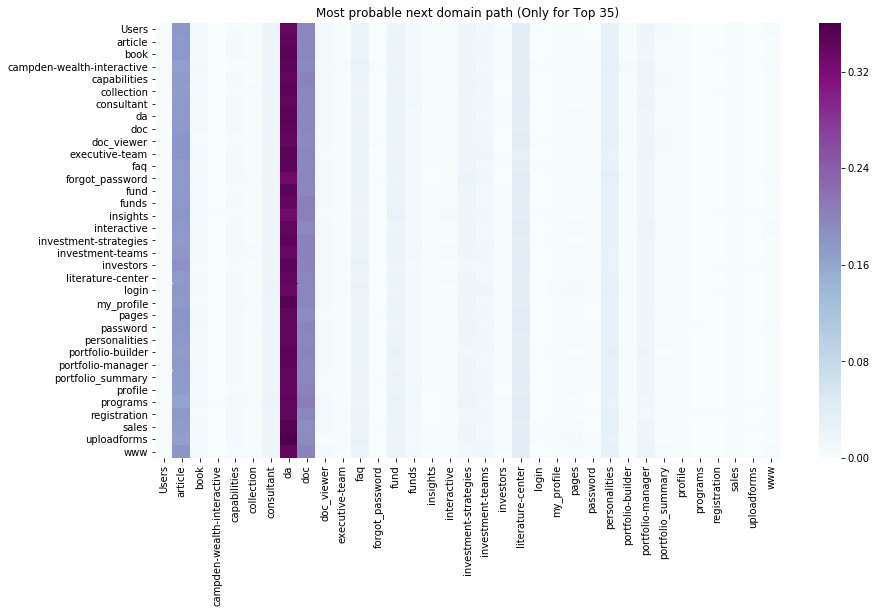

In [123]:
fig = plt.figure(figsize=(14,8))
sns_plot = sns.heatmap(pl_df, cmap='BuPu')
sns_plot.set_title("Most probable next domain path (Only for Top 35)")

In [83]:
fig = sns_plot.get_figure()
fig.savefig("output.png")

In [338]:
first_counts = {}
for key in visitor_paths.keys():
    temp = visitor_paths[key][0]
    if temp not in first_counts:
        first_counts[temp] = 1
    else:
        first_counts[temp] += 1

In [340]:
sorted([(k,v) for k,v in first_counts.items()],key = lambda x:x[1],reverse = True)[:10]

[('da', 116541),
 ('doc', 68379),
 ('article', 60856),
 ('literature-center', 13982),
 ('personalities', 10850),
 ('fund', 9191),
 ('consultant', 7196),
 ('faq', 6728),
 ('investment-strategies', 6054),
 ('portfolio-manager', 5683)]

In [115]:
from nltk import ngrams

In [370]:
most_sequence = []
for key in list(visitor_paths.keys()):
    cc = dict(Counter(ngrams(visitor_paths[key], 7)))
    for k,v in cc.items():
        if v>1:
            if k not in most_sequence:
                most_sequence.append(k)
                print(k)        

('da', 'article', 'article', 'da', 'da', 'article', 'da')
('da', 'da', 'doc', 'da', 'doc', 'da', 'da')
('investment-strategies', 'da', 'da', 'article', 'da', 'da', 'doc')
('da', 'da', 'da', 'da', 'da', 'da', 'da')
('da', 'doc', 'da', 'doc', 'da', 'doc', 'da')
('doc', 'da', 'doc', 'da', 'doc', 'da', 'doc')
('da', 'da', 'da', 'article', 'da', 'da', 'da')
('article', 'da', 'da', 'da', 'da', 'article', 'doc')
('consultant', 'doc', 'da', 'doc', 'da', 'da', 'da')
('da', 'da', 'article', 'doc', 'da', 'da', 'da')
('da', 'article', 'doc', 'da', 'da', 'da', 'article')
('consultant', 'doc', 'da', 'da', 'da', 'doc', 'article')
('da', 'doc', 'da', 'da', 'doc', 'article', 'da')
('da', 'doc', 'article', 'da', 'doc', 'article', 'da')
('article', 'article', 'da', 'article', 'article', 'article', 'da')
('da', 'article', 'da', 'da', 'da', 'da', 'da')
('da', 'da', 'doc', 'doc', 'da', 'article', 'book')
('da', 'doc', 'da', 'da', 'da', 'da', 'doc')
('da', 'da', 'article', 'da', 'da', 'article', 'da')
('da',

In [389]:
sum_browser_times = {k:0 for k in df['browser'].unique()}
count_browser_times = {k:0 for k in df['browser'].unique()}
sum_platform_times = {k:0 for k in df['platform'].unique()}
count_platform_times = {k:0 for k in df['platform'].unique()}

In [416]:
for i in range(len(uniq_vis)): 
    temp_df = df.loc[df['visitor-ids'] == uniq_vis[i]][['timestamp','browser','platform']]
    
    brow = temp_df['browser'].unique()[0]
    plat = temp_df['platform'].unique()[0]
    time_spent = int((temp_df['timestamp'].max()-temp_df['timestamp'].min())/1000)
    
    sum_browser_times[brow] += time_spent
    count_browser_times[brow] += 1
    sum_platform_times[plat] += time_spent
    count_platform_times[plat] += 1
    
    if i%100000 == 0:
        print(i)

0
100000
200000
300000


In [420]:
avg_browser_times = {}
avg_platform_times = {}
for key in sum_browser_times.keys():
    avg_browser_times[key] = sum_browser_times[key]/count_browser_times[key]
for key in sum_platform_times.keys():
    avg_platform_times[key] = sum_platform_times[key]/count_platform_times[key]

{'desktop-windows': 228.2318802102692, 'mobile-ios': 226.2712088144185, 'desktop-macOS': 226.78217063706126, 'mobile-other': 232.63395449506413, 'mobile-android': 228.73842791754137, 'desktop-other': 232.2195750382191}
{'Firefox': 230.15677616676584, 'Safari': 231.8332708020677, 'Chrome, Safari': 226.2712088144185, 'Chrome': 228.32611991009355, 'Edge': 229.5369423012412}


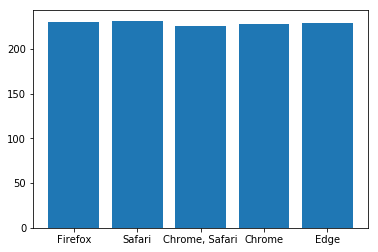

In [422]:
plt.bar(range(len(avg_platform_times)), list(avg_platform_times.values()), align='center')
plt.xticks(range(len(avg_platform_times)), list(avg_platform_times.keys()))
plt.show()

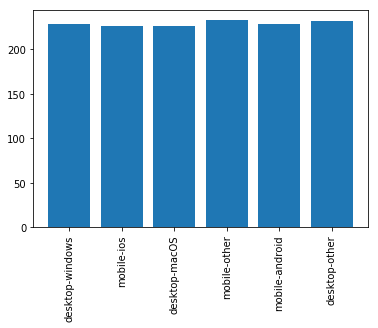

In [427]:
plt.bar(range(len(avg_browser_times)), list(avg_browser_times.values()), align='center')
plt.xticks(range(len(avg_browser_times)), list(avg_browser_times.keys()),rotation=90)

plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [28]:
whole_path = []
for key in visitor_paths.keys():
    whole_path.append(' '.join(visitor_paths[key]))

In [33]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 4))

In [34]:
tfidf_matrix = tfidf_vectorizer.fit_transform(whole_path)

In [35]:
kmeans_model = KMeans(n_clusters=2).fit(tfidf_matrix)
labels = kmeans_model.labels_

In [37]:
#Having 2 Clusters
terms = tfidf_vectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
for i in range(2):
    print("Cluster %d words: " % i, end='')
    
    for ind in order_centroids[i, :25]:
        print(terms[ind], end=',')
    print('\n')

Top terms per cluster:
Cluster 0 words: da da,da da da,da da da da,doc da da,doc da,da da doc,article da da,da doc,da da article,article da,da article,doc da da da,da da da doc,da doc da,article da da da,da da da article,da article da,da doc da da,da da doc da,da da article da,da article da da,doc doc,article doc,literature center,doc article,

Cluster 1 words: doc da,da doc,da da,article da,da article,doc doc,literature center,doc article,article doc,article article,da doc da,da article da,portfolio manager,investment strategies,doc da da,center da,literature center da,da da da,investment teams,da da doc,article da da,da literature,da literature center,doc da doc,doc doc da,



In [32]:
#Having 3 Clusters
terms = tfidf_vectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
for i in range(3):
    print("Cluster %d words: " % i, end='')
    
    for ind in order_centroids[i, :15]:
        print(terms[ind], end=',')
    print('\n')

Top terms per cluster:
Cluster 0 words: da da,da da da,da da da da,doc da da,article da da,da da doc,da da article,doc da,article da,da doc,da da da da da,da article,doc da da da,da da da doc,article da da da,

Cluster 1 words: da da,article da,da article,doc da,da doc,doc doc,literature center,doc article,article doc,article article,da da da,da article da,portfolio manager,article da da,investment strategies,

Cluster 2 words: doc da,da doc,da doc da,doc da doc,doc doc,doc doc da,da doc doc,da da,doc da da,da da doc,doc da doc da,da doc da da,article da doc,da da doc da,da doc da doc,

